In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import nltk

In [2]:
df=pd.read_csv('data/Reviews.csv')

In [3]:
df.shape

(568454, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
# data preparation

In [7]:
df['HelpfulPercentage']=np.where(df.HelpfulnessDenominator>0,df.HelpfulnessNumerator/df.HelpfulnessDenominator,-1)

In [8]:
df.HelpfulPercentage

0         1.0
1        -1.0
2         1.0
3         1.0
4        -1.0
         ... 
568449   -1.0
568450   -1.0
568451    1.0
568452    1.0
568453   -1.0
Name: HelpfulPercentage, Length: 568454, dtype: float64

In [9]:
# assigning different labels to helpfulpercentage according to its value

In [10]:
df.HelpfulPercentage.unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [11]:
pd.cut(df.HelpfulPercentage,bins=[-1,0,0.2,0.4,0.6,0.8,1.0],labels=['Empty','0-20%','20=40%','40-60%','60-80%','80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: HelpfulPercentage, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20=40%' < '40-60%' < '60-80%' < '80-100%']

In [12]:
df['UpvotePercentage']=pd.cut(df.HelpfulPercentage,bins=[-1,0,0.2,0.4,0.6,0.8,1.0],labels=['Empty','0-20%','20=40%','40-60%','60-80%','80-100%'])

In [13]:
df.groupby(['Score','UpvotePercentage']).size()

Score  UpvotePercentage
1      Empty                 8060
       0-20%                 2338
       20=40%                4649
       40-60%                6586
       60-80%                5838
       80-100%              12531
2      Empty                 4234
       0-20%                  762
       20=40%                1618
       40-60%                3051
       60-80%                2486
       80-100%               7014
3      Empty                 5062
       0-20%                  474
       20=40%                1506
       40-60%                3384
       60-80%                2754
       80-100%              11037
4      Empty                 4780
       0-20%                  116
       20=40%                 909
       40-60%                3185
       60-80%                2941
       80-100%              26707
5      Empty                11638
       0-20%                  432
       20=40%                2275
       40-60%               10312
       60-80%           

In [14]:
df.groupby(['Score','UpvotePercentage']).agg({'Id':'count'}).reset_index()

,Score,UpvotePercentage,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20=40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20=40%,1618
9,2,40-60%,3051


In [15]:
df_s=df.groupby(['Score','UpvotePercentage']).agg({'Id':'count'}).reset_index()

In [16]:
# create pivot table for better conclusion

In [17]:
df.Score.unique()

array([5, 1, 4, 2, 3])

In [18]:
df_s.pivot(index='UpvotePercentage',columns='Score')

Id                            
Score                 1     2      3      4       5
UpvotePercentage                                   
Empty              8060  4234   5062   4780   11638
0-20%              2338   762    474    116     432
20=40%             4649  1618   1506    909    2275
40-60%             6586  3051   3384   3185   10312
60-80%             5838  2486   2754   2941   11060
80-100%           12531  7014  11037  26707  140661

In [19]:
# create heatmap for better visualisations

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'how helpful users find among user scores')

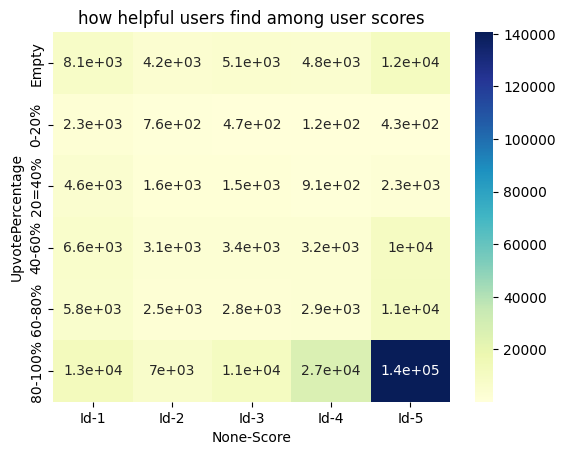

In [21]:
sns.heatmap(df_s.pivot(index='UpvotePercentage',columns='Score'),annot=True,cmap='YlGnBu')
plt.title('how helpful users find among user scores')

In [22]:
df.shape

(568454, 12)

In [23]:
df.Text

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [24]:
df2=df[df.Score!=3]
x=df2.Text
y_dict={1:0,2:0,4:1,5:1}
y=df2.Score.map(y_dict)

In [25]:
df2.Score

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 525814, dtype: int64

In [26]:
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

In [27]:
# convert the text into vector using nlp

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
c=CountVectorizer(stop_words='english')

In [30]:
x_c=c.fit_transform(x)

In [31]:
x_c

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 15966096 stored elements and shape (525814, 114969)>

In [32]:
print('features: {}'.format(x_c.shape[1]))

features: 114969


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y)
print('train records: {}'.format(x_train.shape[0]))

train records: 394360


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log=LogisticRegression()

In [37]:
ml=log.fit(x_train,y_train)
acc=ml.score(x_test,y_test)
print('model acc: {}'.format(acc))

model acc: 0.9372784396062501


In [38]:
# fetch top 20 positive and top 20 negative words

In [39]:
w=c.get_feature_names_out()
w.flatten()

array(['00', '000', '0000', ..., 'être', 'île', 'ît'],
      shape=(114969,), dtype=object)

In [40]:
coef=ml.coef_.tolist()[0]
len(coef)
coef

[-0.3464725055725371,
 0.23648572116917874,
 0.49432357882940386,
 -0.0015351702040009789,
 -0.010870175431106553,
 -0.01014598799436544,
 0.0003773297100445418,
 -0.008520137542838245,
 0.0,
 0.0004060375585674008,
 0.0012176531884499004,
 -0.013074468984277283,
 0.0,
 0.016599386104178788,
 -0.3973954159817316,
 0.0,
 0.002542422559842135,
 0.0031909401769693617,
 0.0009849627458250706,
 5.671921493721955e-05,
 0.12117228269997596,
 0.022105700043389024,
 0.032197296385523676,
 0.032197296385523676,
 0.032197296385523676,
 0.032197296385523676,
 0.032197296385523676,
 0.032197296385523676,
 0.032197296385523676,
 0.032197296385523676,
 0.032197296385523676,
 0.0,
 0.05127182066071218,
 0.0001157854153169277,
 -0.11677837911113863,
 -0.0005197680340177748,
 0.00011126758419026382,
 0.003383662022833641,
 0.079885808984463,
 2.1364776775188206e-05,
 -0.10273168814804319,
 0.02770327679747925,
 3.481848207972914e-05,
 0.0031359168072373133,
 -0.07410215943260125,
 0.0,
 0.0,
 3.82716142

In [41]:
coef_df=pd.DataFrame({'Word':w,'Coef':coef})
coef_df

,Word,Coef
0,00,-0.346473
1,000,0.236486
2,0000,0.494324
3,000001,-0.001535
4,00001,-0.010870
...,...,...
114964,çaykur,0.000821
114965,çelem,-0.142790
114966,être,0.020542
114967,île,0.009382


In [42]:
coef_df=coef_df.sort_values(['Coef','Word'],ascending=False)
coef_df

,Word,Coef
80600,pleasantly,3.827853
39072,downside,3.084891
5865,addicting,3.076021
94667,skeptical,2.546365
113138,worries,2.543503
...,...,...
24949,cancelled,-3.123359
113164,worst,-3.147665
106852,unacceptable,-3.294148
34989,deceptive,-3.750195


In [43]:
print('top 20 positive')
print(coef_df.head(20).to_string(index=False))

top 20 positive
      Word     Coef
pleasantly 3.827853
  downside 3.084891
 addicting 3.076021
 skeptical 2.546365
   worries 2.543503
    hooked 2.479011
    delish 2.477238
  drawback 2.451116
  soothing 2.412441
    resist 2.343610
economical 2.265395
     penny 2.193557
  tastiest 2.136352
  terrific 2.090937
  hesitant 2.077654
      whim 2.055786
  relaxing 2.037184
   easiest 2.015045
    solved 2.009759
   trainer 2.008725


In [44]:
print('top 20 negative')
print(coef_df.tail(20).to_string(index=False))

top 20 negative
         Word      Coef
     canceled -2.379073
          ick -2.403928
        lousy -2.406728
       lacked -2.430079
      allegro -2.474422
   overpowers -2.486564
   unfinished -2.504731
  disapointed -2.553723
      defeats -2.591369
      vomited -2.652643
   returnable -2.722992
       ripoff -2.760441
     mediocre -2.855607
  embarrassed -2.922347
disappointing -3.007568
    cancelled -3.123359
        worst -3.147665
 unacceptable -3.294148
    deceptive -3.750195
  undrinkable -3.885282


In [45]:
# create function to apply multiple nlp techniques and multiple ml agorithms to achieve best acc

In [46]:
def text_fit(x,y,nlp,ml,coef_show=1):
  x_c=nlp.fit_transform(x)
  print('features: {}'.format(x_c.shape[1]))
  x_train,x_test,y_train,y_test=train_test_split(x_c,y)
  print('train records: {}'.format(x_train.shape))
  print('test records: {}'.format(x_test.shape))
  ml=ml.fit(x_train,y_train)
  acc=ml.score(x_test,y_test)
  print('model acc: {}'.format(acc))

  if coef_show==1:
    w=nlp.get_feature_names_out()
    coef=ml.coef_.tolist()[0]
    coef_df=pd.DataFrame({'Word':w,'Coef':coef})
    coef_df=coef_df.sort_values(['Coef','Word'],ascending=[0,1])
    print('top 20 positive')
    print(coef_df.head(20).to_string(index=False))
    print('top 20 positive')
    print(coef_df.head(20).to_string(index=False))

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
c=CountVectorizer(stop_words='english')

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
text_fit(x,y,c,LogisticRegression())

features: 114969
train records: (394360, 114969)
test records: (131454, 114969)
model acc: 0.9375294779923015
top 20 positive
      Word     Coef
pleasantly 4.196522
 skeptical 3.401210
  downside 3.372273
 addicting 3.362620
    resist 2.648834
    hooked 2.584427
    delish 2.504653
  drawback 2.488129
   worries 2.449714
  hesitant 2.386687
economical 2.380990
   easiest 2.351239
    brings 2.281788
     penny 2.276750
    intend 2.265079
  soothing 2.258842
       met 2.212607
   trainer 2.169971
  tastiest 2.140294
 excellent 2.139991
top 20 positive
      Word     Coef
pleasantly 4.196522
 skeptical 3.401210
  downside 3.372273
 addicting 3.362620
    resist 2.648834
    hooked 2.584427
    delish 2.504653
  drawback 2.488129
   worries 2.449714
  hesitant 2.386687
economical 2.380990
   easiest 2.351239
    brings 2.281788
     penny 2.276750
    intend 2.265079
  soothing 2.258842
       met 2.212607
   trainer 2.169971
  tastiest 2.140294
 excellent 2.139991


In [51]:
# define a predict function

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
def predict(x, y, nlp):
  x_c = nlp.fit_transform(x)
  print('features: {}'.format(x_c.shape[1]))
  x_train, x_test, y_train, y_test=train_test_split(x_c, y)
  print('train records: {}'.format(x_train.shape[0]))
  print('test records: {}'.format(x_test.shape[0]))

  return x_train, x_test, y_train, y_test

In [61]:
predict(x, y, c)

features: 114969
train records: 394360
test records: 131454


(<Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 11975185 stored elements and shape (394360, 114969)>,
 <Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 3990911 stored elements and shape (131454, 114969)>,
 466970    1
 343303    1
 257409    1
 308921    1
 395153    1
          ..
 383833    1
 334180    1
 73631     1
 270       1
 292939    1
 Name: Score, Length: 394360, dtype: int64,
 557329    1
 504471    0
 496725    1
 242591    0
 454479    1
          ..
 99181     1
 124677    1
 40440     1
 343104    1
 226263    0
 Name: Score, Length: 131454, dtype: int64)

In [62]:
ml = LinearRegression()

In [63]:
ml = ml.fit(x_train, y_train)
pred = ml.predict(x_test)
cm = confusion_matrix(pred, y_test)
print(cm)
acc = accuracy_score(pred, y_test)
print(acc)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [115]:
# accuracy is around 93% but there are some coefficients that are not meaningful such as 280mg

In [116]:
from sklearn.dummy import DummyClassifier

In [117]:
text_fit(x,y,c,DummyClassifier(),0)

features: 114969
train records: (394360, 114969)
test records: (131454, 114969)
model acc: 0.8435270132517839


In [118]:
# logistic regression model on tf-idf

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
tfidf=TfidfVectorizer(stop_words='english')
text_fit(x,y,tfidf,LogisticRegression())

features: 114969
train records: (394360, 114969)
test records: (131454, 114969)
model acc: 0.9342279428545347
top 20 positive
      Word      Coef
     great 14.003884
 delicious 12.545388
      best 11.746854
   perfect 10.612885
     loves  9.763057
 excellent  9.677068
    highly  8.988994
      love  8.869530
 wonderful  8.327090
   amazing  7.808884
      good  7.636210
  favorite  7.515906
    hooked  7.500020
   awesome  7.354675
      nice  7.213208
pleasantly  7.210156
   pleased  6.722669
    smooth  6.545930
      glad  6.544748
      easy  6.457601
top 20 positive
      Word      Coef
     great 14.003884
 delicious 12.545388
      best 11.746854
   perfect 10.612885
     loves  9.763057
 excellent  9.677068
    highly  8.988994
      love  8.869530
 wonderful  8.327090
   amazing  7.808884
      good  7.636210
  favorite  7.515906
    hooked  7.500020
   awesome  7.354675
      nice  7.213208
pleasantly  7.210156
   pleased  6.722669
    smooth  6.545930
      glad  6.5447

In [121]:
predict(x,y,tfidf,LogisticRegression())

features: 114969
train records: 394360
test records: 131454
[[ 14174   2366]
 [  6218 108696]]
0.9346995907313584


In [122]:
# upvote prediction

In [123]:
data=df[df.Score==5]

In [124]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulPercentage', 'UpvotePercentage'],
      dtype='object')

In [125]:
data2=data[data.UpvotePercentage.isin(['0-20%','20-40%','60-80%','80-100%'])]
data2.shape

(152153, 12)

In [126]:
x=data2.Text

In [127]:
y_dict={'0-20%':0,'20-40%':0,'60-80%':1,'80-100%':1}
y=data2.UpvotePercentage.map(y_dict)

In [128]:
print(y.value_counts())

1.0    151721
0.0       432
Name: UpvotePercentage, dtype: int64


In [129]:
# the target class y is highly skewed, we will observe positive upvotes are too much higher than negative ones

In [130]:
tf=TfidfVectorizer()

In [132]:
x_c=tf.fit_transform(x)

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y,train_size=0.7)

In [134]:
y_test.value_counts()

1.0    45525
0.0      121
Name: UpvotePercentage, dtype: int64

In [135]:
from imblearn.over_sampling import RandomOverSampler

In [136]:
os=RandomOverSampler()

In [141]:
x_train_res,y_train_res=os.fit_resample(x_c,y)

In [142]:
x_train_res.shape,y_train_res.shape

((303442, 66711), (303442,))

In [143]:
from collections import Counter

In [145]:
print('original dataset shape: {}'.format(Counter(y)))
print('resampled dataset shape: {}'.format(Counter(y_train_res)))

original dataset shape: Counter({1.0: 151721, 0.0: 432})
resampled dataset shape: Counter({1.0: 151721, 0.0: 151721})


In [146]:
log_class=LogisticRegression()

In [147]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [150]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[  121     2]
 [    0 45523]]
0.9999561845506726
